In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import cohen_kappa_score, matthews_corrcoef, log_loss
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')
import gc  # Garbage collector

In [2]:
data  = pd.read_csv('clean_df_1Mar2024.csv')

In [3]:
data['Date_Rptd'] = pd.to_datetime(data['Date_Rptd'], format='%m/%d/%Y %I:%M:%S %p')
data['DATE_OCC'] = pd.to_datetime(data['DATE_OCC'], format='%Y-%m-%d')
data['Day_of_Week'] = data['DATE_OCC'].dt.dayofweek.astype('category')
data['Month'] = data['DATE_OCC'].dt.month.astype('category')
data['Year'] = data['DATE_OCC'].dt.year.astype('category')

# Drop the original 'Date_Rptd' and 'DATE_OCC' columns
data = data.drop(['Date_Rptd', 'DATE_OCC'], axis=1)

# Convert 'Vict_Sex' and 'Vict_Descent' to dummy variables
categorical_to_convert = ['Vict_Sex', 'Region_Ethnic_Origin', 'AREA']
data = pd.get_dummies(data, columns=categorical_to_convert, drop_first=True, sparse=True)
data['Day_of_Week'] = data['Day_of_Week'].astype('category')
data['Month'] = data['Month'].astype('category')
data['Year'] = data['Year'].astype('category')

# Create dummy variables for these columns
data = pd.get_dummies(data, columns=['Day_of_Week', 'Month', 'Year'], drop_first=True, sparse = True)


# We will not convert 'LOCATION' due to its high cardinality
data.drop(['LOCATION', 'Vict_Descent', 'DR_NO'], axis=1, inplace=True)

In [4]:
data = data.drop(columns=['Crm_Cd_Desc', 'Crime_Category', 'Crm_Cd', 'AREA_NAME', 'Rpt_Dist_No', 'LAT', 'LON'], axis = 0)

In [5]:
data.columns

Index(['TIME_OCC', 'Part_1-2', 'Vict_Age', 'Avg_Temp', 'Avg_Dewpoint',
       'Avg_Humidity', 'Avg_Windspeed', 'Avg_Pressure', 'Total_Precipitation',
       'Crime_Category_Code', 'Weapon_Reported', 'Vict_Sex_M', 'Vict_Sex_X',
       'Region_Ethnic_Origin_Black',
       'Region_Ethnic_Origin_Hispanic/Latin/Mexican',
       'Region_Ethnic_Origin_Other', 'Region_Ethnic_Origin_Unknown',
       'Region_Ethnic_Origin_White', 'AREA_2', 'AREA_3', 'AREA_4', 'AREA_5',
       'AREA_6', 'AREA_7', 'AREA_8', 'AREA_9', 'AREA_10', 'AREA_11', 'AREA_12',
       'AREA_13', 'AREA_14', 'AREA_15', 'AREA_16', 'AREA_17', 'AREA_18',
       'AREA_19', 'AREA_20', 'AREA_21', 'Day_of_Week_1', 'Day_of_Week_2',
       'Day_of_Week_3', 'Day_of_Week_4', 'Day_of_Week_5', 'Day_of_Week_6',
       'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7',
       'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12', 'Year_2011',
       'Year_2012', 'Year_2013', 'Year_2014', 'Year_2015', 'Year_2016',
       'Yea

In [6]:
X_rf_full = data.drop('Crime_Category_Code', axis=1)  # Features
y_rf_full = data['Crime_Category_Code']

In [7]:
X_rf_full_train, X_rf_full_test, y_rf_full_train, y_rf_full_test = train_test_split(X_rf_full, y_rf_full, test_size=0.2, random_state=42)

In [9]:
rf_full_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs = -1)

In [10]:
print(isinstance(rf_full_model, RandomForestClassifier))

True


In [11]:
rf_full_model.fit(X_rf_full_train,  y_rf_full_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [12]:
y_pred_rf_full = rf_full_model.predict(X_rf_full_test)

# Accuracy
accuracy = accuracy_score(y_rf_full_test, y_pred_rf_full)
print(f"Accuracy: {accuracy:.4f}")

# Classification report
print(classification_report(y_rf_full_test, y_pred_rf_full))

# Confusion Matrix


Accuracy: 0.8132
              precision    recall  f1-score   support

           0       0.83      0.93      0.88    143531
           1       0.62      0.75      0.68     41588
           2       0.95      0.72      0.82     92088
           3       0.64      0.49      0.56     26344
           4       0.71      0.30      0.42     13324
           5       0.91      0.94      0.93    187161
           6       0.58      0.73      0.65     54380
           7       0.64      0.27      0.38     18345

    accuracy                           0.81    576761
   macro avg       0.73      0.64      0.66    576761
weighted avg       0.82      0.81      0.81    576761



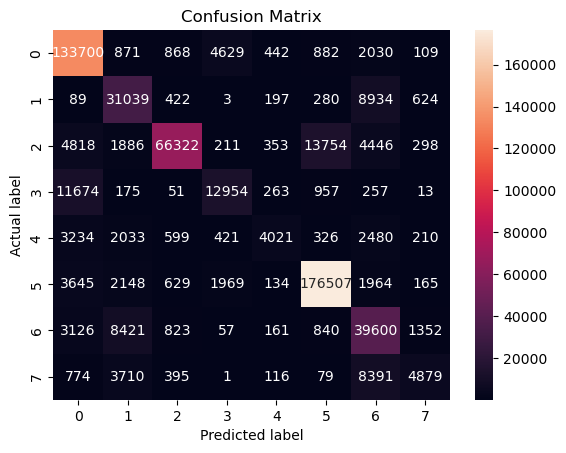

In [13]:
cm = confusion_matrix(y_rf_full_test, y_pred_rf_full)
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [14]:
del rf_full_model
del X_rf_full
del y_rf_full
gc.collect()

10172

In [15]:
X_rf_wo_victim = data.drop(['Crime_Category_Code', 'Vict_Sex_M', 'Vict_Sex_X', 'Region_Ethnic_Origin_Black',
       'Region_Ethnic_Origin_Hispanic/Latin/Mexican',
       'Region_Ethnic_Origin_Other', 'Region_Ethnic_Origin_Unknown',
       'Region_Ethnic_Origin_White', 'Vict_Age'], axis=1)  # Features
y_rf_wo_victim = data['Crime_Category_Code']

In [16]:
X_rf_wo_victim_train, X_rf_wo_victim_test, y_rf_wo_victim_train, y_rf_wo_victim_test = train_test_split(X_rf_wo_victim, y_rf_wo_victim, test_size=0.2, random_state=42)

In [17]:
rf_wo_victim_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs = -1)

In [18]:
rf_wo_victim_model.fit(X_rf_wo_victim_train,  y_rf_wo_victim_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

Accuracy: 0.6761
              precision    recall  f1-score   support

           0       0.82      0.88      0.85    143531
           1       0.58      0.65      0.61     41588
           2       0.50      0.38      0.43     92088
           3       0.51      0.46      0.48     26344
           4       0.38      0.23      0.29     13324
           5       0.74      0.79      0.77    187161
           6       0.55      0.63      0.58     54380
           7       0.40      0.28      0.33     18345

    accuracy                           0.68    576761
   macro avg       0.56      0.54      0.54    576761
weighted avg       0.66      0.68      0.67    576761



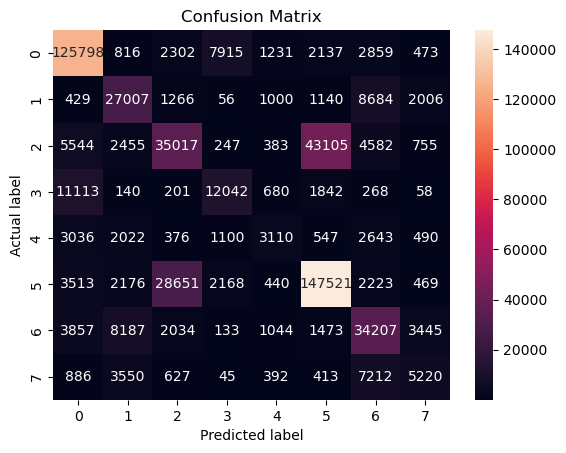

In [19]:
y_pred_wo_victim = rf_wo_victim_model.predict(X_rf_wo_victim_test)

# Accuracy
accuracy = accuracy_score(y_rf_wo_victim_test, y_pred_wo_victim)
print(f"Accuracy: {accuracy:.4f}")

# Classification report
print(classification_report(y_rf_wo_victim_test, y_pred_wo_victim))

# Confusion Matrix
cm = confusion_matrix(y_rf_wo_victim_test, y_pred_wo_victim)
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [20]:
del rf_wo_victim_model
del X_rf_wo_victim
del y_rf_wo_victim
gc.collect()

10062

In [21]:
X_rf_wo_weather = data.drop(['Crime_Category_Code', 'Avg_Temp',
       'Avg_Dewpoint', 'Avg_Humidity', 'Avg_Windspeed', 'Avg_Pressure',
       'Total_Precipitation'], axis=1) 
y_rf_wo_weather = data['Crime_Category_Code']

In [22]:
X_rf_wo_weather_train, X_rf_wo_weather_test, y_rf_wo_weather_train, y_rf_wo_weather_test = train_test_split(X_rf_wo_weather, y_rf_wo_weather, test_size=0.2, random_state=42)

In [23]:
rf_wo_weather_model = RandomForestClassifier(n_estimators=100, random_state=42,  n_jobs = -1)

In [24]:
rf_wo_weather_model.fit(X_rf_wo_weather_train,  y_rf_wo_weather_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

Accuracy: 0.8094
              precision    recall  f1-score   support

           0       0.83      0.92      0.88    143531
           1       0.61      0.73      0.67     41588
           2       0.93      0.72      0.81     92088
           3       0.62      0.50      0.55     26344
           4       0.65      0.31      0.42     13324
           5       0.91      0.94      0.93    187161
           6       0.59      0.70      0.64     54380
           7       0.57      0.29      0.38     18345

    accuracy                           0.81    576761
   macro avg       0.71      0.64      0.66    576761
weighted avg       0.81      0.81      0.80    576761



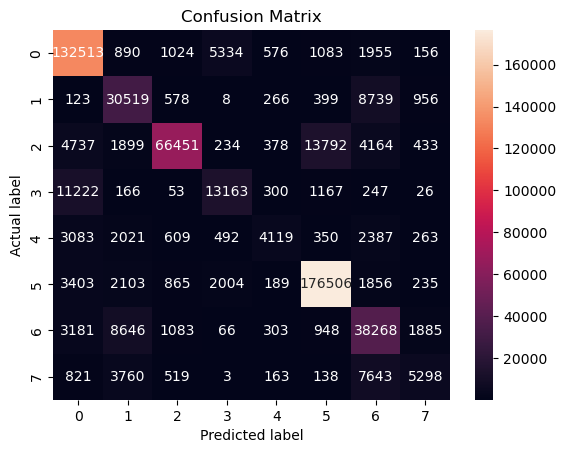

In [25]:
y_pred_wo_weather = rf_wo_weather_model.predict(X_rf_wo_weather_test)

# Accuracy
accuracy = accuracy_score(y_rf_wo_weather_test, y_pred_wo_weather)
print(f"Accuracy: {accuracy:.4f}")

# Classification report
print(classification_report(y_rf_wo_weather_test, y_pred_wo_weather))

# Confusion Matrix
cm = confusion_matrix(y_rf_wo_weather_test, y_pred_wo_weather)
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [26]:
del rf_wo_weather_model
del X_rf_wo_weather
del y_rf_wo_weather
gc.collect()

10163

In [27]:
X_rf_wo_weathervictim = data.drop(['Crime_Category_Code', 'Vict_Sex_M', 'Vict_Sex_X', 'Region_Ethnic_Origin_Black',
       'Region_Ethnic_Origin_Hispanic/Latin/Mexican',
       'Region_Ethnic_Origin_Other', 'Region_Ethnic_Origin_Unknown',
       'Region_Ethnic_Origin_White', 'Vict_Age', 'Crime_Category_Code', 'Avg_Temp',
       'Avg_Dewpoint', 'Avg_Humidity', 'Avg_Windspeed', 'Avg_Pressure',
       'Total_Precipitation'], axis=1)  # Features

y_rf_wo_weathervictim = data['Crime_Category_Code']

In [28]:
X_rf_wo_weathervictim_train, X_rf_wo_weathervictim_test, y_rf_wo_weathervictim_train, y_rf_wo_weathervictim_test = train_test_split(X_rf_wo_weathervictim, y_rf_wo_weathervictim, test_size=0.2, random_state=42)

In [29]:
rf_wo_weathervictim_model = RandomForestClassifier(n_estimators=100, random_state=42,  n_jobs = -1)

In [ ]:
rf_wo_weathervictim_model.fit(X_rf_wo_weathervictim_train,  y_rf_wo_weathervictim_train)

In [ ]:
y_pred_wo_weathervictim = rf_wo_weathervictim_model.predict(X_rf_wo_weathervictim_test)

# Accuracy
accuracy = accuracy_score(y_rf_wo_weathervictim_test, y_pred_wo_weathervictim)
print(f"Accuracy: {accuracy:.4f}")

# Classification report
print(classification_report(y_rf_wo_weathervictim_test, y_pred_wo_weathervictim))

# Confusion Matrix
cm = confusion_matrix(y_rf_wo_weathervictim_test, y_pred_wo_weathervictim)
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
del rf_wo_weathervictim_model
del X_rf_wo_weathervictim
del y_rf_wo_weathervictim
gc.collect()

In [ ]:
importances_full_model = rf_full_model.feature_importances_
features = np.array(X_rf_full.columns)
full_importance = pd.DataFrame(importances_full_model, index=features, columns=['Importance']).sort_values(by='Importance', ascending=False)
print(full_importance)

In [ ]:
importances_wo_weather_model = rf_wo_weather_model.feature_importances_
features = np.array(X_rf_wo_weather.columns)
wo_weather_importance = pd.DataFrame(importances_wo_weather_model, index=features, columns=['Importance']).sort_values(by='Importance', ascending=False)
print(wo_weather_importance)

In [ ]:
importances_wo_victim_model = rf_wo_victim_model.feature_importances_
features = np.array(X_rf_wo_victim.columns)
wo_victim_importance = pd.DataFrame(importances_wo_victim_model, index=features, columns=['Importance']).sort_values(by='Importance', ascending=False)
print(wo_victim_importance)

In [ ]:
importances_wo_weathervictim_model = rf_wo_weathervictim_model.feature_importances_
features = np.array(X_rf_wo_weathervictim.columns)
wo_weathervictim_importance = pd.DataFrame(importances_wo_weathervictim_model, index=features, columns=['Importance']).sort_values(by='Importance', ascending=False)
print(wo_weathervictim_importance)

In [ ]:
from sklearn.calibration import CalibratedClassifierCV

calibrated_rf_full_model = CalibratedClassifierCV(rf_full_model, method='sigmoid', cv=5)
calibrated_rf_full_model.fit(X_rf_full_train, y_rf_full_train)

calibrated_rf_wo_weather_model = CalibratedClassifierCV(rf_wo_weather_model, method='sigmoid', cv=5)
calibrated_rf_wo_weather_model.fit(X_rf_wo_weather_train, y_rf_wo_weather_train)

calibrated_rf_wo_victim_model = CalibratedClassifierCV(rf_wo_victim_model, method='sigmoid', cv=5)
calibrated_rf_wo_victim_model.fit(X_rf_wo_victim_train, y_rf_wo_victim_train)

calibrated_rf_wo_weathervictim_model = CalibratedClassifierCV(rf_wo_weathervictim_model, method='sigmoid', cv=5)
calibrated_rf_wo_weathervictim_model.fit(X_rf_wo_weathervictim_train, y_rf_wo_weathervictim_train)

# Now, you can use predict_proba method for log_loss calculation

# Full model
y_pred_rf_full = calibrated_rf_full_model.predict(X_rf_full_test)
mcc = matthews_corrcoef(y_rf_full_test, y_pred_rf_full)
cohen_kappa = cohen_kappa_score(y_rf_full_test, y_pred_rf_full)
y_pred_proba = calibrated_rf_full_model.predict_proba(X_rf_full_test)
logloss = log_loss(y_rf_full_test, y_pred_proba)
print(f"Full Model - Matthews Correlation Coefficient: {mcc:.4f}, Cohen's Kappa: {cohen_kappa:.4f}, Log Loss: {logloss:.4f}")

# Model without weather
y_pred_wo_weather = calibrated_rf_wo_weather_model.predict(X_rf_wo_weather_test)
mcc = matthews_corrcoef(y_rf_wo_weather_test, y_pred_wo_weather)
cohen_kappa = cohen_kappa_score(y_rf_wo_weather_test, y_pred_wo_weather)
y_pred_proba_wo_weather = calibrated_rf_wo_weather_model.predict_proba(X_rf_wo_weather_test)
logloss = log_loss(y_rf_wo_weather_test, y_pred_proba_wo_weather)
print(f"Without Weather - Matthews Correlation Coefficient: {mcc:.4f}, Cohen's Kappa: {cohen_kappa:.4f}, Log Loss: {logloss:.4f}")

# Model without victim
y_pred_wo_victim = calibrated_rf_wo_victim_model.predict(X_rf_wo_victim_test)
mcc = matthews_corrcoef(y_rf_wo_victim_test, y_pred_wo_victim)
cohen_kappa = cohen_kappa_score(y_rf_wo_victim_test, y_pred_wo_victim)
y_pred_proba_wo_victim = calibrated_rf_wo_victim_model.predict_proba(X_rf_wo_victim_test)
logloss = log_loss(y_rf_wo_victim_test, y_pred_proba_wo_victim)
print(f"Without Victim - Matthews Correlation Coefficient: {mcc:.4f}, Cohen's Kappa: {cohen_kappa:.4f}, Log Loss: {logloss:.4f}")

# Model without weather or victim
y_pred_wo_weathervictim = calibrated_rf_wo_weathervictim_model.predict(X_rf_wo_weathervictim_test)
mcc = matthews_corrcoef(y_rf_wo_weathervictim_test, y_pred_wo_weathervictim)
cohen_kappa = cohen_kappa_score(y_rf_wo_weathervictim_test, y_pred_wo_weathervictim)
y_pred_proba_wo_weathervictim = calibrated_rf_wo_weathervictim_model.predict_proba(X_rf_wo_weathervictim_test)
logloss = log_loss(y_rf_wo_weathervictim_test, y_pred_proba_wo_weathervictim)
print(f"Without Weather or Victim - Matthews Correlation Coefficient: {mcc:.4f}, Cohen's Kappa: {cohen_kappa:.4f}, Log Loss: {logloss:.4f}")